In [74]:
import pandas as pd
import numpy as np
from google.colab import drive
import tensorflow as tf

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
customer_Churn = pd.read_csv('/content/drive/My Drive/Customer Churn/CustomerChurn_dataset.csv')

In [76]:
# Explore the dataset
print("Dataset Info:")
print(customer_Churn.info())

customer_Churn=customer_Churn.drop("customerID",axis=1)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-n

In [77]:
customer_Churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


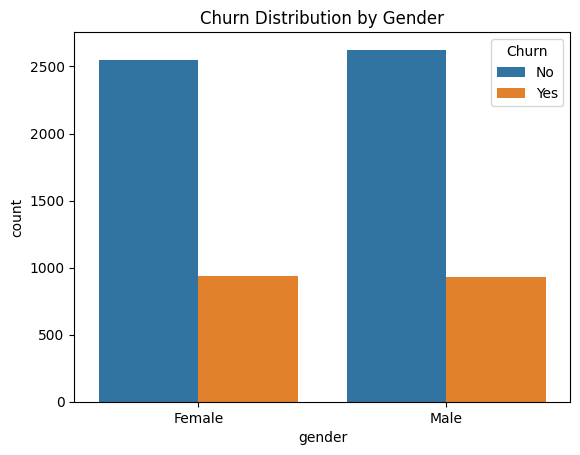

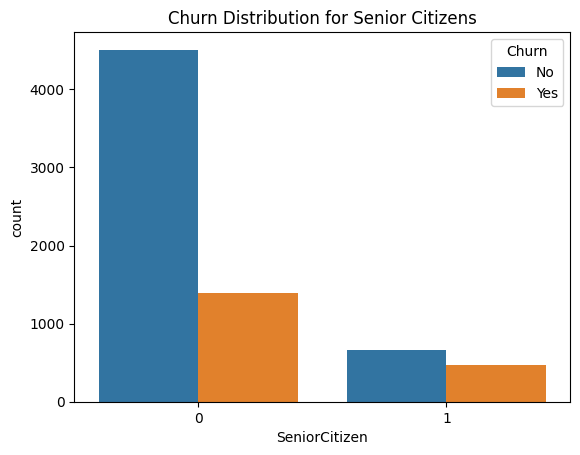

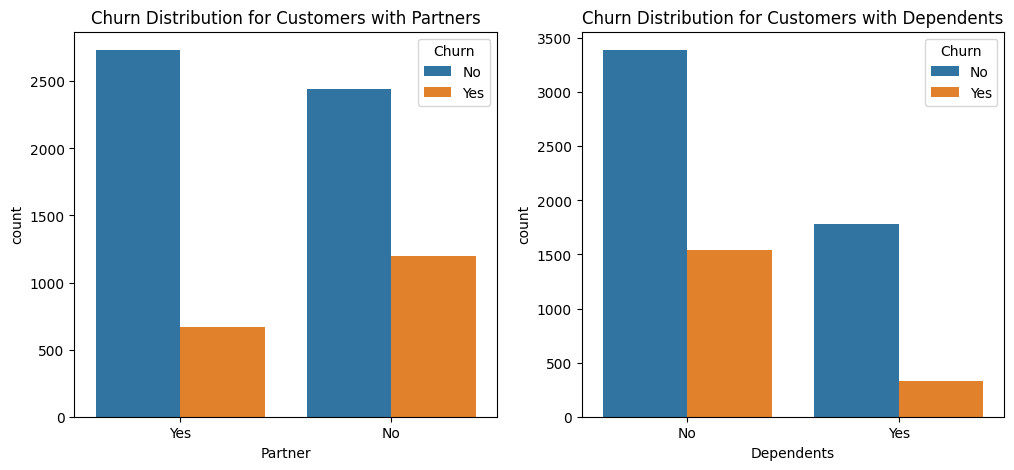

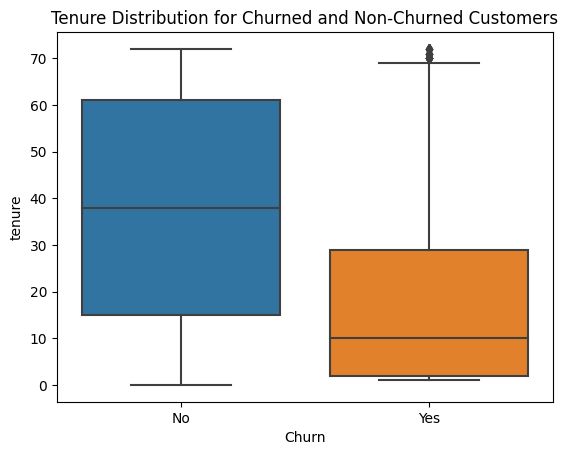

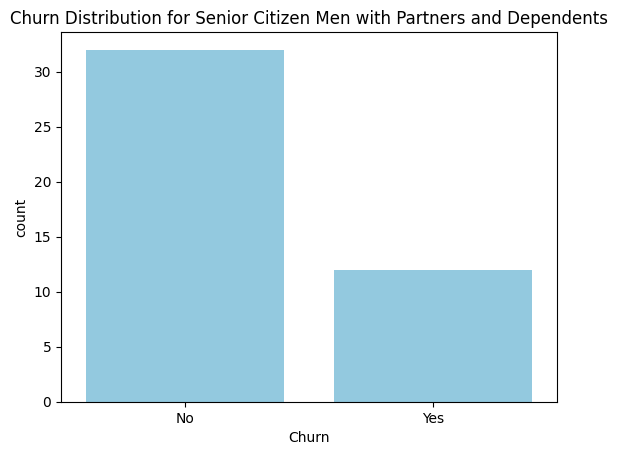

In [78]:
# Using EDA to visualise relationships
import seaborn as sns
import matplotlib.pyplot as plt

# Gender and Churn
sns.countplot(x='gender', hue='Churn', data=customer_Churn)
plt.title('Churn Distribution by Gender')
plt.show()

# Senior Citizens and Churn
sns.countplot(x='SeniorCitizen', hue='Churn', data=customer_Churn)
plt.title('Churn Distribution for Senior Citizens')
plt.show()

# Partner and Dependents
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.countplot(x='Partner', hue='Churn', data=customer_Churn, ax=axes[0])
axes[0].set_title('Churn Distribution for Customers with Partners')

sns.countplot(x='Dependents', hue='Churn', data=customer_Churn, ax=axes[1])
axes[1].set_title('Churn Distribution for Customers with Dependents')
plt.show()

# Tenure and Churn
sns.boxplot(x='Churn', y='tenure', data=customer_Churn)
plt.title('Tenure Distribution for Churned and Non-Churned Customers')
plt.show()

# Multiple Features (e.g., Senior Citizen Men with Partners and Dependents)
filtered_data = customer_Churn[
    (customer_Churn['SeniorCitizen'] == 1) & (customer_Churn['gender'] == 'Male') &
    (customer_Churn['Partner'] == 'Yes') & (customer_Churn['Dependents'] == 'Yes')
]

if not filtered_data.empty:
    sns.countplot(x='Churn', data=filtered_data, color='skyblue')  # Set color explicitly
    plt.title('Churn Distribution for Senior Citizen Men with Partners and Dependents')
    plt.show()
else:
    print("No data matching the specified criteria.")




In [79]:
# Identify categorical columns by selecting columns with 'object' data type
categorical_columns = customer_Churn .select_dtypes(include=['object']).columns


from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns in the combined dataset
for column in categorical_columns:
    customer_Churn[column] = label_encoder.fit_transform(customer_Churn[column])

In [80]:
customer_Churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


In [81]:
from sklearn.ensemble import RandomForestClassifier

#Here, Churn is the target variable
X= customer_Churn.drop('Churn',axis=1)
Y=customer_Churn['Churn']



#Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


# Fit the RandomForest model
rf_model.fit(X_train_rf, y_train_rf)

# Get feature importances
feature_importances_rf = rf_model.feature_importances_



# Create a DataFrame to display feature importances
feature_importance_df_rf = pd.DataFrame({'Feature': X_train_rf.columns, 'Importance': feature_importances_rf})

# Sort the DataFrame by importance in descending order
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)

# Calculate cumulative importance
feature_importance_df_rf['Cumulative Importance'] = feature_importance_df_rf['Importance'].cumsum()

# Set the threshold
threshold_rf = 0.80

# Filter features based on the threshold
selected_features_rf = feature_importance_df_rf[feature_importance_df_rf['Cumulative Importance'] <= threshold_rf]['Feature']

# Display the selected features
print("\nSelected Features (Random Forest):")
print(selected_features_rf)


Selected Features (Random Forest):
17    MonthlyCharges
4             tenure
18      TotalCharges
14          Contract
16     PaymentMethod
8     OnlineSecurity
11       TechSupport
9       OnlineBackup
0             gender
Name: Feature, dtype: object


In [82]:
selected_features_rf

17    MonthlyCharges
4             tenure
18      TotalCharges
14          Contract
16     PaymentMethod
8     OnlineSecurity
11       TechSupport
9       OnlineBackup
0             gender
Name: Feature, dtype: object

In [83]:
from sklearn.preprocessing import StandardScaler
# Apply selected features to both Random Forest and Keras models
X = X[selected_features_rf]
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, Y, test_size=0.2, random_state=42)


# Initialize the StandardScaler
scaler_keras = StandardScaler()


# Standardize numerical features for the Keras model
X = scaler_keras.fit_transform(X)



# Split data into training and testing sets for Keras
X_train_keras, X_test_keras, y_train_keras, y_test_keras = train_test_split(X, Y, test_size=0.2, random_state=42)


In [94]:
# Display the selected features
print("Selected Features:")
print(selected_features_rf)

# Convert X_train_keras to a DataFrame for display
X_train_df = pd.DataFrame(X_train_keras, columns=selected_features_rf)

# Display X_train_df
print("X_train_keras with selected features:")
print(X_train_df.head())


Selected Features:
17    MonthlyCharges
4             tenure
18      TotalCharges
14          Contract
16     PaymentMethod
8     OnlineSecurity
11       TechSupport
9       OnlineBackup
0             gender
Name: Feature, dtype: object
X_train_keras with selected features:
Feature  MonthlyCharges    tenure  TotalCharges  Contract  PaymentMethod  \
0              0.002935 -0.463037     -1.402018  0.371271       1.334863   
1              1.078118  0.880735      0.561913  1.570749      -1.474052   
2             -1.373033 -1.277445     -0.697777 -0.828207       0.398558   
3              0.180747 -1.155283     -0.659653 -0.828207       0.398558   
4             -0.095111 -1.318165     -1.725015  1.570749      -1.474052   

Feature  OnlineSecurity  TechSupport  OnlineBackup    gender  
0              1.407321    -0.925262     -1.029919 -1.009559  
1             -0.918838    -0.925262      1.242550 -1.009559  
2             -0.918838    -0.925262     -1.029919  0.990532  
3             -0

In [85]:
X

array([[-1.16032292, -1.27744458, -0.39860759, ..., -0.92526212,
         1.24254983, -1.00955867],
       [-0.25962894,  0.06632742, -0.94876238, ..., -0.92526212,
        -1.02991925,  0.99053183],
       [-0.36266036, -1.23672422, -1.64188328, ..., -0.92526212,
         1.24254983,  0.99053183],
       ...,
       [-1.1686319 , -0.87024095, -0.13968008, ..., -0.92526212,
        -1.02991925, -1.00955867],
       [ 0.32033821, -1.15528349, -0.31653445, ..., -0.92526212,
        -1.02991925,  0.99053183],
       [ 1.35896134,  1.36937906,  1.13801338, ...,  1.39629866,
        -1.02991925,  0.99053183]])

In [86]:
pip install scikeras

In [87]:
from tensorflow import keras
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler, LabelEncoder



# Keras model creation function
def create_mlp_model(input_shape):
    inputs = Input(shape=(input_shape,))
    hidden1 = Dense(64, activation='relu')(inputs)
    hidden2 = Dense(32, activation='relu')(hidden1)
    output = Dense(1, activation='sigmoid')(hidden2)

    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model




# Wrap the Keras model using KerasClassifier
keras_model = KerasClassifier(build_fn=create_mlp_model, input_shape=X_train_keras.shape[1], epochs=10, batch_size=32, verbose=0)

# Create a parameter grid for grid search
param_grid_keras = {
    'optimizer': ['adam', 'rmsprop'],
     'batch_size': [32, 64],
     'epochs': [10, 20],
}

# Create a GridSearchCV object for Keras
grid_search_keras = GridSearchCV(estimator=keras_model, param_grid=param_grid_keras, scoring='roc_auc', cv=3)

# Fit the grid search on the preprocessed data for Keras
grid_result_keras = grid_search_keras.fit(X_train_keras, y_train_keras)

# Get the best model for Keras
best_model_keras = grid_result_keras.best_estimator_

# Evaluate the best Keras model on the test set
y_pred_keras = best_model_keras.predict(X_test_keras)
accuracy_keras = accuracy_score(y_test_keras, y_pred_keras)

# Display Keras results
print(f"\nBest Parameters (Keras): {grid_result_keras.best_params_}")
print(f"Accuracy on Test Set (Keras): {accuracy_keras}")






/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras


Best Parameters (Keras): {'batch_size': 32, 'epochs': 10, 'optimizer': 'adam'}
Accuracy on Test Set (Keras): 0.801277501774308


In [88]:
from sklearn.metrics import roc_auc_score

# Evaluate the best Keras model on the test set
y_pred_proba_keras = best_model_keras.predict_proba(X_test_keras)[:, 1]
auc_score_keras = roc_auc_score(y_test_keras, y_pred_proba_keras)
print(f"AUC Score on Test Set (Keras): {auc_score_keras}")

AUC Score on Test Set (Keras): 0.8492526421480845


In [89]:
from tensorflow.keras.optimizers import Adam, RMSprop

# Create a new Keras model with the best parameters
retrained_model = create_mlp_model(input_shape=X_train_keras.shape[1])

# Set the best parameters to the retrained model
retrained_model.optimizer = Adam() if best_params_keras['optimizer'] == 'adam' else RMSprop()
retrained_model.batch_size = best_params_keras['batch_size']
retrained_model.epochs = best_params_keras['epochs']

# Retrain the model on the entire training dataset
retrained_model.fit(X_train_keras, y_train_keras, epochs=best_params_keras['epochs'], batch_size=best_params_keras['batch_size'], verbose=1)

# Evaluate the retrained model on the test set
y_pred_retrained = retrained_model.predict(X_test_keras)

#Threshold the predicted probabilities to obtain binary predictions
y_pred_binary = (y_pred_retrained > 0.5).astype(int)

# Calculate accuracy on the test set
accuracy_retrained = accuracy_score(y_test_keras, y_pred_binary)

# Display retrained model results
print("\nRetrained Model Results:")
print(f"Best Parameters (Keras): {best_params_keras}")
print(f"Accuracy on Test Set (Retrained Model): {accuracy_retrained}")






Epoch 1/10
177/177 [==============================] - 1s 1ms/step - loss: 0.4673 - accuracy: 0.7705
Epoch 2/10
177/177 [==============================] - 0s 1ms/step - loss: 0.4306 - accuracy: 0.7932
Epoch 3/10
177/177 [==============================] - 0s 1ms/step - loss: 0.4256 - accuracy: 0.7945
Epoch 4/10
177/177 [==============================] - 0s 1ms/step - loss: 0.4242 - accuracy: 0.7966
Epoch 5/10
177/177 [==============================] - 0s 1ms/step - loss: 0.4216 - accuracy: 0.8024
Epoch 6/10
177/177 [==============================] - 0s 1ms/step - loss: 0.4209 - accuracy: 0.8017
Epoch 7/10
177/177 [==============================] - 0s 1ms/step - loss: 0.4207 - accuracy: 0.8000
Epoch 8/10
177/177 [==============================] - 0s 1ms/step - loss: 0.4173 - accuracy: 0.7989
Epoch 9/10
177/177 [==============================] - 0s 1ms/step - loss: 0.4163 - accuracy: 0.8030
Epoch 10/10
45/45 [==============================] - 0s 926us/step

Retrained Model Results:
Best Pa

In [90]:
# Make predictions on the training set
y_train_pred_keras = retrained_model.predict(X_train_keras)

# Threshold the predicted probabilities to obtain binary predictions
y_train_pred_binary = (y_train_pred_keras > 0.5).astype(int)

# Evaluate the model on the training set
accuracy_train_keras = accuracy_score(y_train_keras, y_train_pred_binary)
print(f"Accuracy on the Training Set (Retrained Keras Model): {accuracy_train_keras}")

# Make predictions on the testing set
y_test_pred_keras = retrained_model.predict(X_test_keras)

# Threshold the predicted probabilities to obtain binary predictions
y_test_pred_binary = (y_test_pred_keras > 0.5).astype(int)

# Evaluate the model on the testing set
accuracy_test_keras = accuracy_score(y_test_keras, y_test_pred_binary)
print(f"Accuracy on the Testing Set (Retrained Keras Model): {accuracy_test_keras}")


177/177 [==============================] - 0s 889us/step
Accuracy on the Training Set (Retrained Keras Model): 0.8065317713880015
45/45 [==============================] - 0s 916us/step
Accuracy on the Testing Set (Retrained Keras Model): 0.808374733853797


In [91]:
y_test_pred_rf


array([1, 0, 0, ..., 0, 0, 1])

In [92]:
import pickle


# Define the filename for the pickle file
filename = '/content/drive/My Drive/Customer Churn/CustomerChurn_model.pkl'

# Save the best model to a pickle file
with open(filename, 'wb') as file:
    pickle.dump(best_model_keras, file)

print(f"Best model saved to {filename}")

Best model saved to /content/drive/My Drive/Customer Churn/CustomerChurn_model.pkl


In [95]:
import pickle


# Define the filename for the pickle file
filename = '/content/drive/My Drive/Customer Churn/scaler.pkl'

# Save the best model to a pickle file
with open(filename, 'wb') as file:
    pickle.dump(scaler_keras, file)

print(f"Best model saved to {filename}")



Best model saved to /content/drive/My Drive/Customer Churn/scaler.pkl
